In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
import warnings 

In [4]:
warnings.filterwarnings("ignore")

In [ ]:
from zipfile import ZipFile
with ZipFile("archive (53).zip","r") as f:
    f.extractall("")

In [5]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1376,ham,Auntie huai juan never pick up her phone,NaN,NaN,NaN
1625,ham,Hi Dear Call me its urgnt. I don't know whats ...,NaN,NaN,NaN
4932,ham,Once free call me sir.,NaN,NaN,NaN
171,ham,"Hmmm.. Thk sure got time to hop ard... Ya, can...",NaN,NaN,NaN
4148,ham,Haven't found a way to get another app for you...,NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


<Axes: >

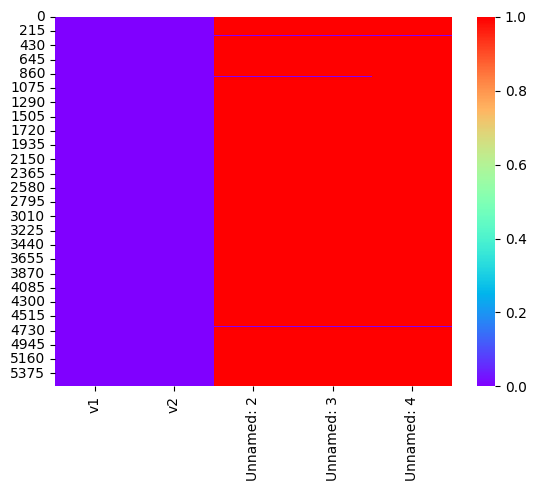

In [11]:
sb.heatmap(df.isnull(),cbar=True,cmap="rainbow")

In [12]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [13]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis = 1)

In [14]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df = df.rename({"v1":"Label","v2":"Massages"},axis = 1)

In [16]:
df.head()

,Label,Massages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.duplicated().sum()

403

In [18]:
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

<Axes: xlabel='Label', ylabel='count'>

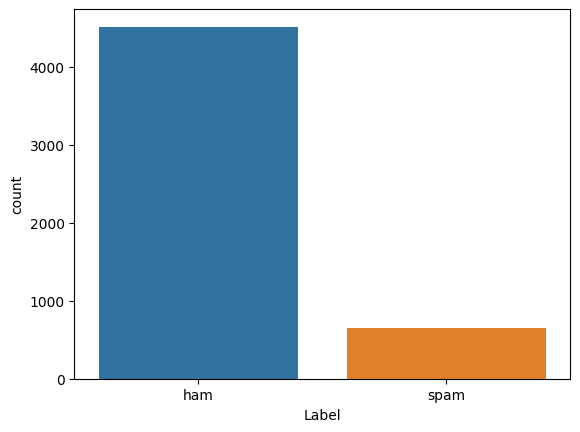

In [21]:
sb.countplot(x = "Label",data = df)

In [22]:
df["Label"].value_counts()

ham     4516
spam     653
Name: Label, dtype: int64

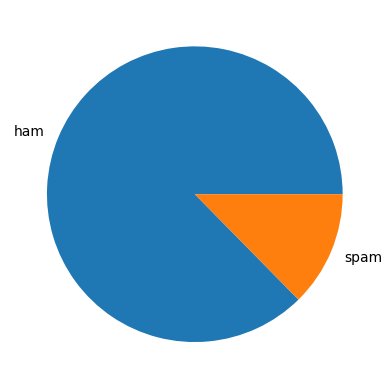

In [23]:
mpl.pie(df["Label"].value_counts(),labels= ["ham","spam"],)
mpl.show()

In [24]:
df["Massages"] = df["Massages"].str.lower()

In [25]:
df["Massages"][0]

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

In [26]:
import string
punc = string.punctuation
print(punc)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [27]:
def rem_punc(text):
    txt = [i for i in text if i not in punc]
    return "".join(txt)

In [28]:
df["Massages"] = df["Massages"].apply(rem_punc)

In [29]:
df["Massages"][0]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

In [30]:
import nltk

In [31]:
from nltk.corpus import stopwords

In [32]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
stopwords=nltk.corpus.stopwords.words('english')

In [34]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
def rem_stpword(text):
    txt = [i for i in text.split() if i not in stopwords]
    return " ".join(txt)

In [36]:
df["Massages"] = df["Massages"].apply(rem_stpword)

In [37]:
df["Massages"]

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u å£750 pound prize...
5568                          ì b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: Massages, Length: 5169, dtype: object

In [38]:
df["Massages_alphabets"] = df["Massages"].apply(len)

In [39]:
df.head()

,Label,Massages,Massages_alphabets
0,ham,go jurong point crazy available bugis n great ...,82
1,ham,ok lar joking wif u oni,23
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,135
3,ham,u dun say early hor u c already say,35
4,ham,nah dont think goes usf lives around though,43


In [40]:
df["Msg_word_count"] = df["Massages"].apply(lambda x: len(x.split()))

In [41]:
from nltk.tokenize import sent_tokenize

In [42]:
df["Msg_sen_count"] = df["Massages"].apply(lambda x: len(sent_tokenize(x)))

In [43]:
df.head(3)

,Label,Massages,Massages_alphabets,Msg_word_count,Msg_sen_count
0,ham,go jurong point crazy available bugis n great ...,82,16,1
1,ham,ok lar joking wif u oni,23,6,1
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,135,23,1


In [44]:
df.describe()

,Massages_alphabets,Msg_word_count,Msg_sen_count
count,5169.000000,5169.000000,5169.000000
mean,52.837299,9.234862,0.999033
std,40.955405,6.726968,0.031089
min,0.000000,0.000000,0.000000
25%,23.000000,4.000000,1.000000
50%,39.000000,7.000000,1.000000
75%,76.000000,13.000000,1.000000
max,516.000000,80.000000,1.000000


In [45]:
df[df["Label"] == "spam"].describe()

,Massages_alphabets,Msg_word_count,Msg_sen_count
count,653.000000,653.000000,653.0
mean,106.355283,16.548239,1.0
std,26.654331,4.796428,0.0
min,12.000000,2.000000,1.0
25%,96.000000,14.000000,1.0
50%,112.000000,17.000000,1.0
75%,124.000000,20.000000,1.0
max,159.000000,28.000000,1.0


In [46]:
df[df["Label"] == "ham"].describe()

,Massages_alphabets,Msg_word_count,Msg_sen_count
count,4516.000000,4516.000000,4516.000000
mean,45.098760,8.177369,0.998893
std,36.649723,6.294488,0.033259
min,0.000000,0.000000,0.000000
25%,21.000000,4.000000,1.000000
50%,34.000000,6.000000,1.000000
75%,59.000000,11.000000,1.000000
max,516.000000,80.000000,1.000000


In [47]:
lab = df.groupby("Label")

In [48]:
lab.describe().T

Label                             ham        spam
Massages_alphabets count  4516.000000  653.000000
                   mean     45.098760  106.355283
                   std      36.649723   26.654331
                   min       0.000000   12.000000
                   25%      21.000000   96.000000
                   50%      34.000000  112.000000
                   75%      59.000000  124.000000
                   max     516.000000  159.000000
Msg_word_count     count  4516.000000  653.000000
                   mean      8.177369   16.548239
                   std       6.294488    4.796428
                   min       0.000000    2.000000
                   25%       4.000000   14.000000
                   50%       6.000000   17.000000
                   75%      11.000000   20.000000
                   max      80.000000   28.000000
Msg_sen_count      count  4516.000000  653.000000
                   mean      0.998893    1.000000
                   std       0.033259    0.000000
                   min       0.000000    1.000000
                   25%       1.000000    1.000000
                   50%       1.000000    1.000000
                   75%       1.000000    1.000000
                   max       1.000000    1.000000

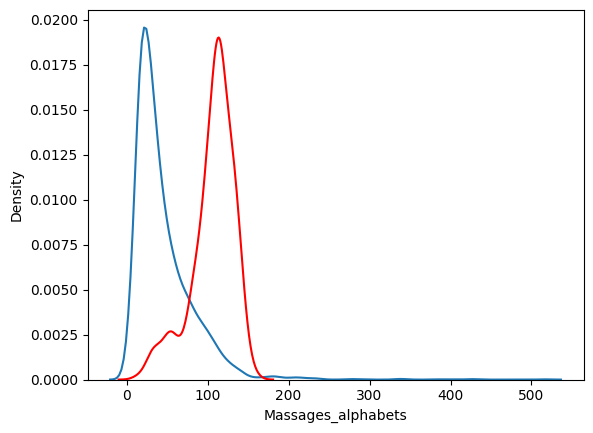

In [51]:
sb.kdeplot(df[df["Label"] == "ham"]["Massages_alphabets"])
sb.kdeplot(df[df["Label"] == "spam"]["Massages_alphabets"],color = "red")
mpl.show()

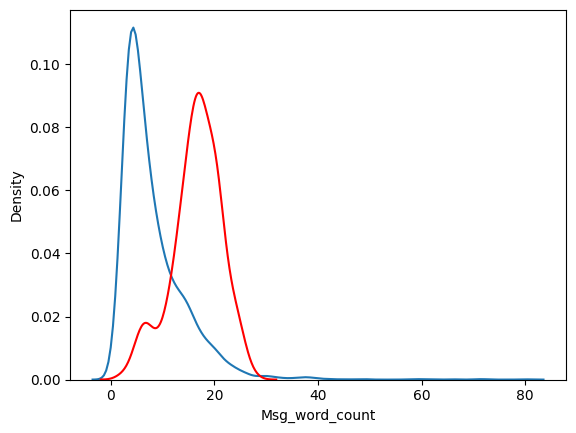

In [53]:
sb.kdeplot(df[df["Label"] == "ham"]["Msg_word_count"])
sb.kdeplot(df[df["Label"] == "spam"]["Msg_word_count"],color = "red")
mpl.show()

In [54]:
df["spam"] = pd.get_dummies(df["Label"],drop_first=True)

In [55]:
df.sample(3)

,Label,Massages,Massages_alphabets,Msg_word_count,Msg_sen_count,spam
4588,ham,finished work yet something,27,4,1,0
3726,ham,aldrine rakhesh ex rtm herepls callurgent,41,6,1,0
2106,ham,thank like well,15,3,1,0


In [56]:
df = df.drop(["Label","Msg_sen_count"],axis = True)

In [57]:
df.corr()

,Massages_alphabets,Msg_word_count,spam
Massages_alphabets,1.000000,0.964191,0.496947
Msg_word_count,0.964191,1.000000,0.413447
spam,0.496947,0.413447,1.000000


In [58]:
from textblob import TextBlob

In [59]:
def spel_cor(text):
    sen = TextBlob(text)
    return sen.correct()

In [60]:
df["Massages"] = df["Massages"].apply(spel_cor)

In [61]:
df["Massages"][2]

TextBlob("free entry 2 wily come win a cup final this must may 2005 text a 87121 receive entry questions txt rates apply 08452810075over18s")

In [62]:
df["Massages"] = df["Massages"].apply(lambda x : ''.join(x))

In [63]:
df["Massages"][0]

'go during point crazy available boris n great world la e buffets line got more wat'

In [64]:
import nltk
from nltk.tokenize import word_tokenize

In [65]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
def token(text):
    tok = word_tokenize(text)
    return tok

In [67]:
df["Massages_tok"] = df["Massages"].apply(token)

In [68]:
df["Massages_tok"][0]

['go',
 'during',
 'point',
 'crazy',
 'available',
 'boris',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffets',
 'line',
 'got',
 'more',
 'wat']

In [69]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [70]:
def stemmin(text):
    txt = [ps.stem(i) for i in text]
    return txt

In [71]:
stemmin(df["Massages_tok"][0])

['go',
 'dure',
 'point',
 'crazi',
 'avail',
 'bori',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'line',
 'got',
 'more',
 'wat']

In [72]:
df["Massages_tok"].apply(stemmin)

0       [go, dure, point, crazi, avail, bori, n, great...
1                              [ok, war, joke, if, u, on]
2       [free, entri, 2, wili, come, win, a, cup, fina...
3           [u, dun, say, earli, for, u, c, alreadi, say]
4        [ah, dont, think, goe, us, live, around, though]
                              ...                        
5567    [and, time, tri, 2, contact, u, u, å£750, poun...
5568                       [ì, b, go, esplanad, fr, home]
5569                           [piti, mood, ani, suggest]
5570    [guy, itch, act, like, id, interest, buy, some...
5571                                   [roll, true, name]
Name: Massages_tok, Length: 5169, dtype: object

In [73]:
def joint(text):
  headline = [i for i in text]
  return ' '.join(headline)

In [74]:
df["Massages_tok"] = df["Massages_tok"].apply(joint)

In [75]:
df["Massages_tok"] 

0       go during point crazy available boris n great ...
1                                   ok war joking if u on
2       free entry 2 wily come win a cup final this mu...
3                     u dun say early for u c already say
4               ah dont think goes us lives around though
                              ...                        
5567    and time tried 2 contact u u å£750 pound prize...
5568                          ì b going esplanade fr home
5569                            pity mood any suggestions
5570    guy itching acted like id interested buying so...
5571                                       roll true name
Name: Massages_tok, Length: 5169, dtype: object

In [76]:
from wordcloud import WordCloud

In [77]:
wc = WordCloud(width=500,height=500,background_color="white")

In [79]:
spam_wc = wc.generate(df[df["spam"] == 1]["Massages_tok"].str.cat(sep = " "))

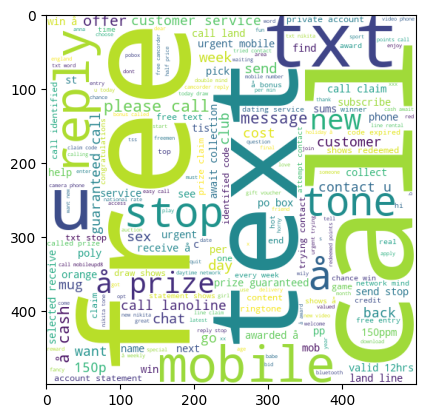

In [80]:
mpl.imshow(spam_wc)

In [81]:
not_spam_wc = wc.generate(df[df["spam"] == 0]["Massages_tok"].str.cat(sep = " "))

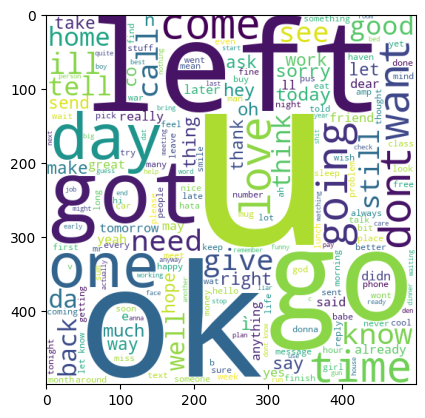

In [82]:
mpl.imshow(not_spam_wc)

In [83]:
corpus = []

for i in df["Massages_tok"]:
    corpus.append(i)

In [84]:
corpus

['go during point crazy available boris n great world la e buffets line got more wat',
 'ok war joking if u on',
 'free entry 2 wily come win a cup final this must may 2005 text a 87121 receive entry questions txt rates apply 08452810075over18s',
 'u dun say early for u c already say',
 'ah dont think goes us lives around though',
 'freemen hey darling 3 weeks word back id like fun still to ok xxx st cogs send å£150 rev',
 'even brother like speak treat like aids patent',
 'per request selle selle or minnaminunginte nurungu vestas set callertune callers press 9 copy friends callertune',
 'winner valued network customer selected received å£900 prize reward claim call 09061701461 claim code kl341 valid 12 hours',
 'mobile 11 months u r entitled update latest colour mobile camera free call mobile update co free 08002986030',
 'in donna home soon dont want talk stuff anymore tonight k give cried enough today',
 'six chances win cash 100 20000 pounds txt csh11 send 87575 cost 150pday days 1

In [85]:
df.head()

,Massages,Massages_alphabets,Msg_word_count,spam,Massages_tok
0,go during point crazy available boris n great ...,82,16,0,go during point crazy available boris n great ...
1,ok war joking if u on,23,6,0,ok war joking if u on
2,free entry 2 wily come win a cup final this mu...,135,23,1,free entry 2 wily come win a cup final this mu...
3,u dun say early for u c already say,35,9,0,u dun say early for u c already say
4,ah dont think goes us lives around though,43,8,0,ah dont think goes us lives around though


In [86]:
X = df["Massages_tok"]
y = df["spam"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state = 42,test_size=0.3)

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
countvector=CountVectorizer()
X_train_tfm=countvector.fit_transform(X_train)
X_test_tfm=countvector.transform(X_test)

In [88]:
X_train_tfm = X_train_tfm.toarray()
X_test_tfm = X_test_tfm.toarray()

In [89]:
X_train_tfm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [99]:
from sklearn.metrics import *

In [91]:
from sklearn.ensemble import RandomForestClassifier
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth = 5,min_samples_split=20)
randomclassifier.fit(X_train_tfm,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       n_estimators=200)

In [92]:
rf_y_pred = randomclassifier.predict(X_test_tfm)

In [93]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1331
           1       1.00      0.01      0.03       220

    accuracy                           0.86      1551
   macro avg       0.93      0.51      0.48      1551
weighted avg       0.88      0.86      0.80      1551



In [94]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_tfm,y_train)

GaussianNB()

In [95]:
nb_y_pred = nb.predict(X_test_tfm)

In [96]:
print(classification_report(y_test,nb_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1331
           1       0.48      0.86      0.62       220

    accuracy                           0.85      1551
   macro avg       0.73      0.86      0.76      1551
weighted avg       0.90      0.85      0.87      1551



In [97]:
from sklearn.metrics import *

In [98]:
precision_score(y_test,nb_y_pred)

0.4846938775510204